# Admin

In [1]:
from dataclasses import dataclass

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.optimize import curve_fit
from scipy.spatial.distance import squareform

import Calibration_Function as CF

In [ ]:
# Note Calibration_Function contains the following functions, Calibration_Fitter doesn't work yet (I need to swap the x and y values around), Full_Calibration simply fuses the two calibration functions together and therefore by extension doesnt fully work either:
#
#  def chi_squared(model_params,
#                  model,
#                  x_data,
#                  y_data,
#                  y_error):
#     -> chi_squared for the data
#
#
# def reduced_chi_squared(Chi_squared,
#                         DoF):
#     -> reduced chi squared
#
#
# def Calibration_Index(file_name,
#                       sheet_names,
#                       column_names)
#     -> mean peak indexes, uncertainty on the peak indexes
#
# def Calibration_Fitter(model,
#                        p0_model,
#                        start_index,
#                        wavelengths,
#                        mean_indexes,
#                        uncertainties):
#   -> popt_model, cov_model
#
# def Full_Calibration(file_name,
#                      sheet_names,
#                      column_names,
#                      model,
#                      p0_model,
#                      start_index,
#                      wavelengths):
#   -> popt_model, cov_model, mean_indexes, uncertainties

# Data Processing

In [2]:
#This is currently set up for the trial data from yesterday, all of this needs updating :)


wavelengths = [632.8, 543.5, 594.1 ]

sheets = ['Red', 'Green', 'Orange']
cols = [['R_A_1', 'R_A_2', 'R_A_3', 'R_A_4', 'R_A_5'],['G_A_1','G_A_2'],['O_A_1','O_A_2']]
file = "Trial.xlsx"

def model(x, A, B):
    return A + np.exp(x*B)

p0_model =[1,1]

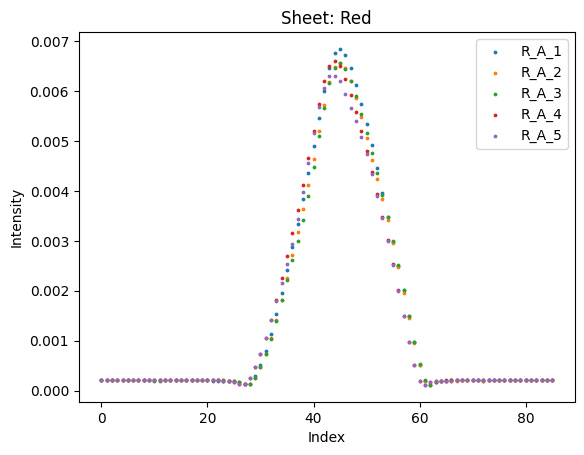

----- Results -----
Sheet 'Red': mean peak index = 44.4
----- ----- -----


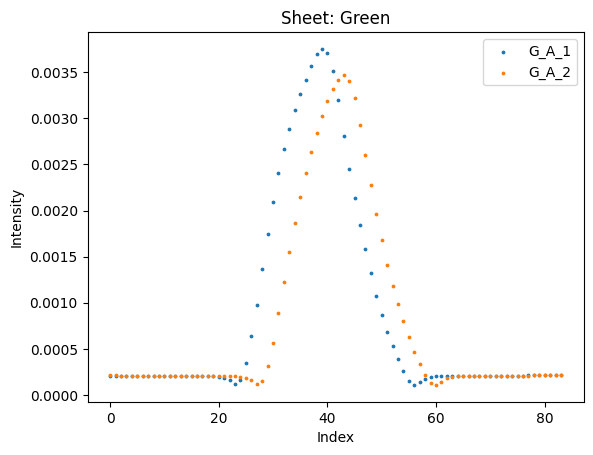

----- Results -----
Sheet 'Green': mean peak index = 41.0
----- ----- -----


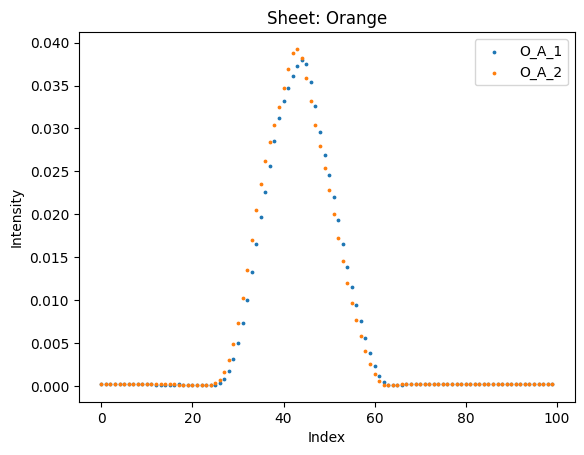

----- Results -----
Sheet 'Orange': mean peak index = 43.5
----- ----- -----


C:\Users\sebas\AppData\Local\Temp\ipykernel_14732\1813436081.py:8: RuntimeWarning: overflow encountered in exp
  return A + np.exp(x*B)
C:\Users\sebas\PycharmProjects\Advanced-Lab-Code\Monochromator_Calibration\Calibration_Function.py:85: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_model, cov_model = curve_fit(


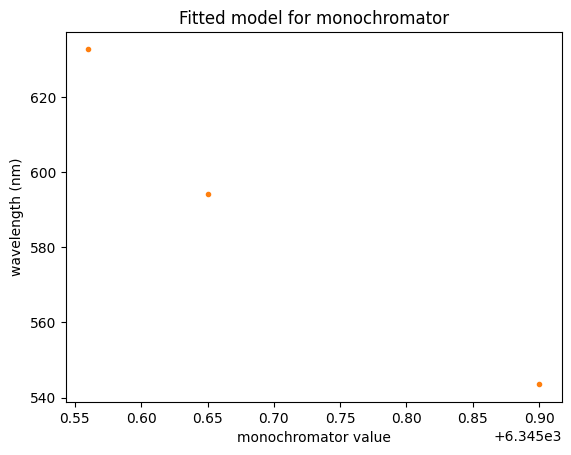

----- Results -----
gradient:  1.0000 ± inf
intercept: 1.0000 ± inf
reduced chi^2: inf


(array([1., 1.]),
 array([[inf, inf],
        [inf, inf]]),
 [np.float64(44.4), np.float64(41.0), np.float64(43.5)],
 [np.float64(0.35777087639996635),
  np.float64(1.414213562373095),
  np.float64(0.35355339059327373)])

In [3]:
CF.Full_Calibration(file_name=file,
                 sheet_names=sheets,
                 column_names=cols,
                 model=model,
                 p0_model=p0_model,
                 start_index=6350,
                 wavelengths=wavelengths
                 )